In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/fibe hackathon/dataset/train.csv')

In [3]:
df.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(25000, 5480)

In [5]:
df=df.drop('id',axis=1)

In [6]:
import numpy as np
print(np.any(np.isnan(df)))
print(np.any(np.isinf(df)))

True
True


In [7]:
# dataset contains high extreme or low extreme values
# replacing infinity values with some large value or small values
df.replace([np.inf,-np.inf],-1e9,inplace=True)

In [8]:
print(np.any(np.isinf(df))) 

False


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)
missing_value_df

,column_name,percent_missing
var_2834,var_2834,100.0
var_2908,var_2908,100.0
var_3893,var_3893,100.0
var_3894,var_3894,100.0
var_636,var_636,100.0
...,...,...
var_5290,var_5290,0.0
var_5291,var_5291,0.0
var_5292,var_5292,0.0
var_5293,var_5293,0.0


In [10]:
mxmiss=missing_value_df[missing_value_df['percent_missing']>=80.0]

In [11]:
mxmiss.shape

(1861, 2)

In [12]:
# so we've 1861 attributes which have more than 80 percent missing values, we need to drop them out
row_index=mxmiss.index
row_index=list(row_index)
df=df.drop(row_index,axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 3618 entries, var_1 to target
dtypes: float64(3617), int64(1)
memory usage: 690.1 MB


In [14]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472,target
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.012270,0.008547,0.016317,NaN,NaN,0.000000,NaN,0.000000,NaN,0
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.055215,0.145299,0.109557,NaN,0.067114,0.049020,0.073684,0.062992,0.000000,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.079755,NaN,0.065268,0.026316,0.020134,0.068627,NaN,0.036745,0.008333,0
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,NaN,NaN,0.006993,NaN,0.000000,NaN,NaN,0.000000,NaN,0
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.042945,NaN,0.055944,0.000000,NaN,0.009804,NaN,0.005249,NaN,0


In [15]:
print(np.any(np.isnan(df))) # true indicates it has nan values

True


In [16]:
dff=df.iloc[:,:-1]
dff
y=df.iloc[:,-1]

In [17]:
dff.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.011905,0.012270,0.008547,0.016317,NaN,NaN,0.000000,NaN,0.000000,NaN
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.107143,0.055215,0.145299,0.109557,NaN,0.067114,0.049020,0.073684,0.062992,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.047619,0.079755,NaN,0.065268,0.026316,0.020134,0.068627,NaN,0.036745,0.008333
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,0.005952,NaN,NaN,0.006993,NaN,0.000000,NaN,NaN,0.000000,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.017857,0.042945,NaN,0.055944,0.000000,NaN,0.009804,NaN,0.005249,NaN


In [18]:
dff.to_csv('data.csv') # dataframe into a csv file

In [19]:
import dask.dataframe as dd 
df_da=dd.read_csv('data.csv') # reading the dataframe as dask_dataframe to make it into chunks and preprocessing ( any process ) will be easy

In [20]:
def dd(df):
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
  return df
df_da=dd(df_da)

In [21]:
df_da.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.011905,0.012270,0.008547,0.016317,NaN,NaN,0.000000,NaN,0.000000,NaN
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.107143,0.055215,0.145299,0.109557,NaN,0.067114,0.049020,0.073684,0.062992,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.047619,0.079755,NaN,0.065268,0.026316,0.020134,0.068627,NaN,0.036745,0.008333
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,0.005952,NaN,NaN,0.006993,NaN,0.000000,NaN,NaN,0.000000,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.017857,0.042945,NaN,0.055944,0.000000,NaN,0.009804,NaN,0.005249,NaN


In [22]:
# converting into numpy array
def mgen(df):
  data=df.values
  return data
df_dask1=mgen(df_da)

In [23]:
df_dask1

dask.array<values, shape=(nan, 3617), dtype=float64, chunksize=(nan, 3617), chunktype=numpy.ndarray>

In [24]:
# replacing all nan values with zero
df_dask1[np.isnan(df_dask1)]=0

In [25]:
type(df_dask1)

dask.array.core.Array

In [26]:
def col(df):
  columns=df.columns
  return columns
columns=col(df_da)

In [27]:
len(columns)

3617

In [28]:
# standardizing the data ( scaling the data )
from sklearn.preprocessing import MinMaxScaler
def minmax(df_df):
  global scaler
  scaler=MinMaxScaler()
  dd=scaler.fit_transform(df_df)
  return dd
data_scaled=minmax(df_dask1)

/usr/local/lib/python3.9/dist-packages/dask/array/core.py:1712: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


In [29]:
data_scaled

array([[0.015625  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1875    , 0.        , 0.        , ..., 0.07368421, 0.06299213,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03674541,
        0.00833333],
       ...,
       [0.046875  , 0.        , 0.        , ..., 0.        , 0.01312336,
        0.        ],
       [0.125     , 0.        , 0.        , ..., 0.02105263, 0.05511811,
        0.        ],
       [0.03125   , 0.        , 0.        , ..., 0.        , 0.00262467,
        0.        ]])

In [30]:
data_scaled.shape[1]

3617

In [31]:
"""
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

n_components = (data_scaled.shape[1])
svd = TruncatedSVD(n_components=n_components)
svd.fit_transform(data_scaled) 
explained_var_ratio = svd.explained_variance_ratio_
plt.plot(np.cumsum(explained_var_ratio))
plt.show()
"""

'\nfrom sklearn.decomposition import TruncatedSVD\nimport matplotlib.pyplot as plt\n\nn_components = (data_scaled.shape[1])\nsvd = TruncatedSVD(n_components=n_components)\nsvd.fit_transform(data_scaled) \nexplained_var_ratio = svd.explained_variance_ratio_\nplt.plot(np.cumsum(explained_var_ratio))\nplt.show()\n'

In [32]:
# as we can observe from the above scree plot the elbow taking place at the range(0-500)
# take n_components as 500

In [33]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
data_imputed=svd.fit_transform(data_scaled)

In [34]:
data_imputed.shape

(25000, 500)

In [35]:
svd.components_.shape

(500, 3617)

In [36]:
data_imp=np.dot(data_imputed,svd.components_)

In [37]:
data_imp.shape

(25000, 3617)

In [38]:
# descaling the data
final_data=scaler.inverse_transform(data_imp)

In [39]:
final_data

array([[ 1.67939409e-02, -1.48402432e-02, -4.53854602e-03, ...,
        -3.07351946e-03,  9.04313098e-04,  1.69298165e-04],
       [ 1.88335822e-01, -2.14121911e-03,  1.15800075e-03, ...,
         7.91971957e-02,  6.65999770e-02,  5.75758204e-04],
       [ 3.12707343e-03,  3.53226055e-02, -9.56852777e-03, ...,
         2.96737699e-02,  5.82884710e-02,  4.64329922e-03],
       ...,
       [ 4.63716407e-02,  2.25358787e-03,  9.29925310e-05, ...,
         6.04610397e-03,  9.23302600e-03, -1.09139387e-03],
       [ 1.25313015e-01, -4.65764789e-04,  8.10119214e-03, ...,
         2.44931244e-02,  5.21879188e-02,  1.38464486e-03],
       [ 3.13007948e-02,  1.97721756e-03,  5.30984404e-04, ...,
        -4.22090393e-04,  4.83664731e-03, -9.14054764e-04]])

In [40]:
final_data.shape

(25000, 3617)

In [41]:
# converting it into a dataframe
final_dataframe=pd.DataFrame(final_data,columns=columns)

In [42]:
final_dataframe.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.016794,-0.014840,-0.004539,-0.000951,-0.003656,-9.033912e-18,-0.001317,0.006456,0.355121,0.109418,...,0.012850,0.010827,0.009240,0.016929,-0.003824,0.000679,-0.001438,-0.003074,0.000904,0.000169
1,0.188336,-0.002141,0.001158,-0.001278,0.003864,2.337994e-17,0.001702,0.001646,0.150892,0.102208,...,0.111719,0.059124,0.135094,0.110054,0.008846,0.065530,0.041113,0.079197,0.066600,0.000576
2,0.003127,0.035323,-0.009569,0.010235,0.004345,1.828164e-17,-0.000152,-0.007211,0.003215,0.009333,...,0.056887,0.088195,-0.046807,0.067287,0.001992,0.031267,0.099434,0.029674,0.058288,0.004643
3,0.155933,-0.000661,-0.002275,0.000767,0.000801,-1.209697e-16,-0.000334,-0.000929,0.018507,0.104536,...,0.008855,-0.000745,-0.000615,0.007036,0.002613,-0.001365,-0.002218,0.000988,0.002026,0.000355
4,0.046695,-0.000686,0.000733,-0.000420,-0.002218,1.432323e-16,0.000970,-0.000242,0.096026,0.106648,...,0.027910,0.044593,0.009140,0.058927,0.015095,-0.007835,0.003618,-0.004558,0.003267,-0.002038


In [43]:
class_distribution=pd.value_counts(y,normalize=True)
print(class_distribution) # therefore, the dataset is imbalanced

0    0.85316
1    0.14684
Name: target, dtype: float64


In [44]:
# we perform undersampling to reduce the instances in the majority class to class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(final_dataframe, y)

In [45]:
X_resampled.shape 

(7342, 3617)

In [46]:
class_distribution1=pd.value_counts(y_resampled,normalize=True)
print(class_distribution1) # therefore, the dataset is balanced

0    0.5
1    0.5
Name: target, dtype: float64


In [47]:
print(np.any(np.isnan(X_resampled))) # no nan values 

False


In [48]:
X_resampled = X_resampled.loc[:, X_resampled.nunique() > 1]  # removing features with constant values, as it may affect the model performance

In [49]:
X_resampled.shape

(7342, 1724)

In [51]:
X_resampled.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,-0.000381,-0.000790,0.000947,0.000228,-0.000140,-1.848443e-16,0.001184,-0.000050,-0.000127,-0.001197,...,0.001682,0.003036,0.018085,0.011996,-0.000324,-0.001338,0.004256,0.003968,0.005451,0.000365
1,0.030934,0.000375,-0.000659,0.001267,0.000491,1.889691e-16,-0.000133,-0.000595,0.036495,0.108201,...,0.005383,-0.000465,0.000168,0.008685,-0.004003,-0.001632,0.002967,0.002529,0.001986,-0.000549
2,0.062257,-0.004629,-0.000521,-0.000873,0.005372,1.610726e-16,0.000458,0.001480,0.024348,0.108471,...,-0.000341,0.001128,0.002818,0.007234,0.000722,-0.003151,-0.004175,-0.000389,0.001765,0.000579
3,-0.000465,-0.009002,-0.009914,-0.002963,0.013322,1.309513e-16,-0.007873,-0.001019,0.001342,0.004045,...,0.106479,0.081550,0.057704,0.107501,0.034824,0.066221,0.039266,-0.008160,0.046950,0.010357
4,0.000035,-0.000421,0.000252,0.000560,-0.000287,1.104332e-16,-0.000362,0.000118,0.000022,-0.000242,...,-0.000921,0.003088,0.002538,0.008192,-0.001873,-0.001583,0.000253,-0.002538,0.002193,-0.000475


In [124]:
from sklearn.preprocessing import MinMaxScaler
ml=MinMaxScaler()
X_sca=ml.fit_transform(X_resampled)

In [160]:
X_scaled=pd.DataFrame(X_sca,columns=X_resampled.columns)

In [161]:
X_scaled.shape,y_resampled.shape

((7342, 1724), (7342,))

In [162]:
X_scaled.head() 

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.013117,0.120023,0.107002,0.032631,0.155582,3.049398e-16,0.028402,0.024131,0.003952,0.029125,...,0.031684,0.070866,0.049769,0.017381,0.032242,0.057741,0.035891,0.046139,0.012683,0.034022
1,0.058221,0.121417,0.103618,0.033651,0.156804,6.787532e-16,0.027186,0.023648,0.040463,0.414196,...,0.035181,0.066549,0.031285,0.013775,0.028248,0.057455,0.034621,0.044719,0.008843,0.031238
2,0.103339,0.115431,0.103909,0.031549,0.166257,6.508567e-16,0.027732,0.025486,0.028352,0.415146,...,0.029772,0.068513,0.034018,0.012195,0.033379,0.055974,0.027578,0.041839,0.008598,0.034674
3,0.012996,0.110202,0.084121,0.029496,0.181652,6.207353e-16,0.020042,0.023273,0.005416,0.047579,...,0.130715,0.167711,0.090642,0.121417,0.070412,0.123592,0.070414,0.034174,0.058667,0.064469
4,0.013716,0.120464,0.105538,0.032956,0.155298,6.002173e-16,0.026975,0.024280,0.004100,0.032487,...,0.029224,0.070931,0.033730,0.013238,0.030561,0.057503,0.031945,0.039720,0.009072,0.031466


In [ ]:
"""
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.33, random_state=42)

# Define estimator for RFE
estimator = RandomForestClassifier()

# Define number of features to select and step size
n_features_to_select = 1000
step = 1

# Initialize RFE object
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=step)

# Fit RFE on training set
rfe.fit(X_train, y_train)

# Use transformed data to select top features
selected_features = X_train.columns[rfe.support_]

# Evaluate performance of selected features on testing set
selected_X_train = rfe.transform(X_train)
selected_X_test = rfe.transform(X_test)
estimator.fit(selected_X_train, y_train)
score = estimator.score(selected_X_test, y_test)
"""

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split\nimport pandas as pd\n\n\n# Split data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.33, random_state=42)\n\n# Define estimator for RFE\nestimator = RandomForestClassifier()\n\n# Define number of features to select and step size\nn_features_to_select = 1000\nstep = 1\n\n# Initialize RFE object\nrfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=step)\n\n# Fit RFE on training set\nrfe.fit(X_train, y_train)\n\n# Use transformed data to select top features\nselected_features = X_train.columns[rfe.support_]\n\n# Evaluate performance of selected features on testing set\nselected_X_train = rfe.transform(X_train)\nselected_X_test = rfe.transform(X_test)\nestimator.fit(selected_X_train, y_train)\nscore = estimator.score(selected_X_test, y_test)\

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/fibe hackathon/dataset/test.csv')
df_test.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,0.035714,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN
1,id_2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_3,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test=df_test.drop('id',axis=1)

In [ ]:
df_test.replace([np.inf,-np.inf],-1e9,inplace=True)

In [ ]:
print(np.any(np.isinf(df_test)))

False


In [ ]:
import numpy as np

In [ ]:
percent_missing_test1 = df_test.isnull().sum() * 100 / len(df_test)
missing_value_df_test1 = pd.DataFrame({'column_name': df_test.columns,'percent_missing': percent_missing_test1})
missing_value_df_test2= missing_value_df_test1.sort_values('percent_missing', ascending=False)
missing_value_df_test2

,column_name,percent_missing
var_1586,var_1586,100.0
var_1141,var_1141,100.0
var_3161,var_3161,100.0
var_3160,var_3160,100.0
var_1137,var_1137,100.0
...,...,...
var_4389,var_4389,0.0
var_4390,var_4390,0.0
var_4391,var_4391,0.0
var_4392,var_4392,0.0


In [ ]:
mxmiss_test1=missing_value_df_test1[missing_value_df_test1['percent_missing']>=80.0]

In [ ]:

mxmiss_test1

,column_name,percent_missing
var_11,var_11,94.28
var_12,var_12,80.54
var_15,var_15,94.28
var_16,var_16,80.54
var_19,var_19,94.66
...,...,...
var_5474,var_5474,95.64
var_5475,var_5475,95.72
var_5476,var_5476,97.32
var_5477,var_5477,99.98


In [ ]:
mxmiss_test1.shape

(1869, 2)

In [ ]:
row_index_test=mxmiss_test1.index
row_index_test=list(row_index_test)
df_test=df_test.drop(row_index_test,axis=1) 

In [ ]:
df_test.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.128426,...,0.059524,0.036810,0.068376,0.079254,0.052632,0.046980,0.049020,0.084211,0.070866,0.0125
1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.111644,...,0.041667,0.055215,NaN,0.069930,0.105263,0.026846,0.029412,NaN,0.044619,NaN
2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,0.106633,...,0.017857,0.049080,0.000000,0.037296,NaN,0.000000,0.029412,NaN,0.010499,NaN
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.029762,NaN,NaN,0.020979,0.026316,0.020134,NaN,NaN,0.015748,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.106633,...,0.011905,0.006135,NaN,0.011655,NaN,NaN,0.000000,NaN,0.000000,NaN


In [ ]:
print(np.any(np.isinf(df_test)))
print(np.any(np.isnan(df_test)))

False
True


In [ ]:
df_test.to_csv('df_test.csv')

In [ ]:
import dask.dataframe as dd

In [ ]:
df_test_dd=dd.read_csv('df_test.csv')

In [ ]:
df_test_dd.head()

,Unnamed: 0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,0.059524,0.036810,0.068376,0.079254,0.052632,0.046980,0.049020,0.084211,0.070866,0.0125
1,1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,0.041667,0.055215,NaN,0.069930,0.105263,0.026846,0.029412,NaN,0.044619,NaN
2,2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,0.017857,0.049080,0.000000,0.037296,NaN,0.000000,0.029412,NaN,0.010499,NaN
3,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.029762,NaN,NaN,0.020979,0.026316,0.020134,NaN,NaN,0.015748,NaN
4,4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.011905,0.006135,NaN,0.011655,NaN,NaN,0.000000,NaN,0.000000,NaN


In [ ]:
def dd(df):
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
  return df
df_daa=dd(df_test_dd)

In [ ]:
# converting into numpy array
def mgen(df):
  data=df.values
  return data
df_dask2=mgen(df_daa)

In [ ]:
# replacing all nan values with zero
df_dask2[np.isnan(df_dask2)]=0

In [ ]:
type(df_dask2)

dask.array.core.Array

In [ ]:
def col(df):
  columns=df.columns
  return columns
columns1=col(df_daa)

In [ ]:
len(columns1)

3609

In [ ]:
# standardizing the data ( scaling the data )
from sklearn.preprocessing import MinMaxScaler
def minmax(df_df):
  global scaler
  scaler=MinMaxScaler()
  dd=scaler.fit_transform(df_df)
  return dd
data_scaled1=minmax(df_dask2)

/usr/local/lib/python3.9/dist-packages/dask/array/core.py:1712: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


In [ ]:
data_scaled1

array([[0.01754386, 0.        , 0.        , ..., 0.06956522, 0.06835443,
        0.02830189],
       [0.01754386, 0.        , 0.        , ..., 0.        , 0.04303797,
        0.        ],
       [0.01754386, 0.        , 0.        , ..., 0.        , 0.01012658,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00253165,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0173913 , 0.03544304,
        0.00943396],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01518987,
        0.        ]])

In [ ]:
data_scaled1.shape[1]

3609

In [ ]:
"""
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

n_components = (data_scaled1.shape[1])
svd = TruncatedSVD(n_components=n_components)
svd.fit_transform(data_scaled1) 
explained_var_ratio = svd.explained_variance_ratio_
plt.plot(np.cumsum(explained_var_ratio))
plt.show()
"""

'\nfrom sklearn.decomposition import TruncatedSVD\nimport matplotlib.pyplot as plt\n\nn_components = (data_scaled1.shape[1])\nsvd = TruncatedSVD(n_components=n_components)\nsvd.fit_transform(data_scaled1) \nexplained_var_ratio = svd.explained_variance_ratio_\nplt.plot(np.cumsum(explained_var_ratio))\nplt.show()\n'

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd1 = TruncatedSVD(n_components=500)
data_imputed1=svd1.fit_transform(data_scaled1)

In [ ]:
data_imputed1.shape

(5000, 500)

In [ ]:
svd1.components_.shape

(500, 3609)

In [ ]:
data_imp1=np.dot(data_imputed1,svd1.components_)

In [ ]:
data_imp1.shape

(5000, 3609)

In [ ]:
# descaling the data
final_data1=scaler.inverse_transform(data_imp1)

In [ ]:
final_data1

array([[ 1.32095781e-02, -3.63710557e-04,  1.36007424e-03, ...,
         7.61047474e-02,  6.31807284e-02,  9.12160776e-03],
       [ 1.49119407e-02,  8.25308309e-04,  1.93514634e-03, ...,
         2.90081501e-03,  4.02936683e-02,  1.95607680e-03],
       [ 1.65210076e-02,  4.59981198e-04, -4.05894223e-04, ...,
        -5.33746741e-03,  7.68327358e-03,  1.47421954e-03],
       ...,
       [ 1.33702013e-03, -1.44377947e-03, -4.38824612e-03, ...,
        -1.44539542e-03,  5.35481916e-04, -3.06396299e-03],
       [ 3.42220548e-03,  6.88537225e-03,  2.94434641e-05, ...,
         2.30857094e-02,  3.88634595e-02,  4.03097393e-03],
       [ 1.12761687e-03, -1.52564950e-03, -4.93276753e-04, ...,
        -6.07375803e-03,  1.81856790e-02,  1.88283913e-04]])

In [ ]:
# converting it into a dataframe
final_dataframe1=pd.DataFrame(final_data1,columns=columns1)

In [ ]:
final_dataframe1.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.013210,-0.000364,0.001360,0.002683,-0.001929,-1.883961e-16,0.001418,0.000983,0.018487,0.127791,...,0.054974,0.039139,0.075015,0.079908,0.059480,0.033473,0.052573,0.076105,0.063181,0.009122
1,0.014912,0.000825,0.001935,-0.004486,-0.000809,-1.004520e-16,-0.000312,-0.000442,0.018626,0.111845,...,0.051780,0.053342,0.000401,0.070253,0.079340,0.028003,0.037744,0.002901,0.040294,0.001956
2,0.016521,0.000460,-0.000406,0.012469,0.002706,5.558275e-17,-0.000403,-0.000381,0.011333,0.106994,...,0.017111,0.046722,0.009680,0.039445,-0.003995,0.005908,0.020352,-0.005337,0.007683,0.001474
3,0.002358,-0.001003,-0.001672,-0.004601,0.001185,-1.012483e-16,0.002170,0.000281,-0.000744,-0.000073,...,0.029610,0.000622,0.003639,0.024107,0.021395,0.013874,0.000850,0.001977,0.014049,-0.001188
4,0.046156,0.000137,0.001751,0.002777,-0.001075,6.035234e-17,-0.000737,0.000116,-0.000012,0.105976,...,0.010210,0.007484,0.000447,0.013177,-0.002253,0.002184,-0.001328,-0.004382,0.001954,-0.001920


In [ ]:
col2=set(final_dataframe1.columns)
print(len(col2))

3609


In [ ]:
X_resampled.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,-0.000346,0.000259,0.001813,0.000243,-0.001609,2.868326e-17,0.000236,-0.000360,-0.000121,-0.001073,...,0.002177,0.002811,0.017025,0.012189,-0.000193,-0.000453,0.002898,0.004119,0.005652,0.000421
1,0.030940,-0.002297,0.001423,0.000938,0.002667,-5.647784e-17,-0.000702,0.000141,0.036540,0.108198,...,0.005320,-0.001003,0.000772,0.008839,-0.005481,-0.001771,0.003003,0.003660,0.002023,-0.000294
2,0.062147,-0.001871,-0.000652,-0.000691,0.004125,-9.159277e-17,-0.000748,0.000697,0.024461,0.108474,...,0.000129,0.001826,0.000738,0.007471,-0.000026,-0.002808,-0.003812,-0.000882,0.001669,0.000516
3,-0.001661,-0.011078,0.007394,0.003973,-0.018253,2.540293e-17,0.000657,0.000391,0.001687,0.003474,...,0.115524,0.073444,0.043237,0.104153,0.050858,0.072040,0.034163,-0.014434,0.049905,0.008991
4,0.000006,-0.000250,0.000248,0.000790,-0.000997,-3.146274e-17,-0.000122,0.000119,-0.000011,-0.000142,...,-0.000646,0.002930,0.002508,0.008132,-0.001060,-0.001586,0.000086,-0.003097,0.002122,-0.000540


In [ ]:
col1=set(X_resampled.columns)
print(len(col1))

3617


In [ ]:

col3=col1.intersection(col2)
col4=list(col3)
len(col4)

3596

In [ ]:
for i in X_resampled.columns:
  if(i in col4):
    continue
  else:
    X_scaled=X_scaled.drop(i,axis=1) 

In [ ]:
for i in final_dataframe1.columns:
  if(i in col4):
    continue
  else:
    final_dataframe1=final_dataframe1.drop(i,axis=1)

In [ ]:
print(X_resampled.shape)
print(final_dataframe1.shape)

(7342, 3596)
(5000, 3596)


In [ ]:
X_resampled.shape,final_dataframe1.shape

((7342, 3596), (5000, 3596))

In [ ]:
"""
import dask.dataframe as dd
X_dask=dd.from_pandas(X_resampled,npartitions=27)
"""

In [ ]:
"""
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Fit the TruncatedSVD model on your data
svd = TruncatedSVD(n_components=1000)
svd.fit(X_resampled)

# Obtain the explained variance ratios
explained_variance_ratios = svd.explained_variance_ratio_

# Compute the cumulative sum of the explained variance ratios
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)

# Plot the cumulative explained variance ratios
plt.plot(cumulative_variance_ratios)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()
"""

"\nfrom sklearn.decomposition import TruncatedSVD\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Fit the TruncatedSVD model on your data\nsvd = TruncatedSVD(n_components=1000)\nsvd.fit(X_resampled)\n\n# Obtain the explained variance ratios\nexplained_variance_ratios = svd.explained_variance_ratio_\n\n# Compute the cumulative sum of the explained variance ratios\ncumulative_variance_ratios = np.cumsum(explained_variance_ratios)\n\n# Plot the cumulative explained variance ratios\nplt.plot(cumulative_variance_ratios)\nplt.xlabel('Number of components')\nplt.ylabel('Cumulative explained variance ratio')\nplt.show()\n"

In [90]:
X_scaled.shape

(7342, 1724)

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y_resampled,random_state=42,test_size=0.33)

In [164]:
"""
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
train_score=[]
test_score=[]
values=[i for i in range(1,20)]
for i in range(1,20):
  model=RandomForestClassifier(n_estimators=25,max_depth=i,random_state=None,criterion="gini")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc1=accuracy_score(y_pred,y_test)
  y1_pred=model.predict(x_train)
  acc=accuracy_score(y1_pred,y_train) 
  train_score.append(acc)
  test_score.append(acc1) 
plt.plot(values,train_score,'-o',label="train")
plt.plot(values,test_score,'-o',label="test")
plt.xlabel("max_depth")
plt.ylabel("acc")
plt.legend()
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\ntrain_score=[]\ntest_score=[]\nvalues=[i for i in range(1,20)]\nfor i in range(1,20):\n  model=RandomForestClassifier(n_estimators=25,max_depth=i,random_state=None,criterion="gini")\n  model.fit(x_train,y_train)\n  y_pred=model.predict(x_test)\n  acc1=accuracy_score(y_pred,y_test)\n  y1_pred=model.predict(x_train)\n  acc=accuracy_score(y1_pred,y_train) \n  train_score.append(acc)\n  test_score.append(acc1) \nplt.plot(values,train_score,\'-o\',label="train")\nplt.plot(values,test_score,\'-o\',label="test")\nplt.xlabel("max_depth")\nplt.ylabel("acc")\nplt.legend()\nplt.show()\n'

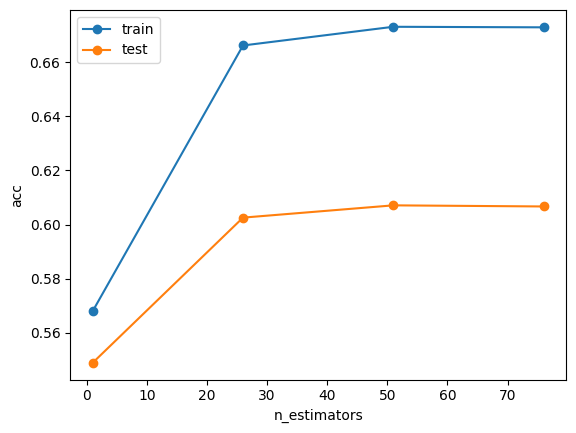

In [165]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
train_score=[]
test_score=[]
ra=100
values=[i for i in range(1,ra,25)]
for i in range(1,ra,25):
  model=RandomForestClassifier(n_estimators=i,max_depth=4,random_state=42,criterion="entropy")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc1=accuracy_score(y_pred,y_test)
  y1_pred=model.predict(x_train)
  acc=accuracy_score(y1_pred,y_train) 
  train_score.append(acc)
  test_score.append(acc1) 
plt.plot(values,train_score,'-o',label="train")
plt.plot(values,test_score,'-o',label="test")
plt.xlabel("n_estimators")
plt.ylabel("acc")
plt.legend()
plt.show()

In [166]:
# from the above graph we can conclude that after max_depth= 5 it is getting overfit

In [167]:
# from the above graph we can conclude that after n_estimators is getting overfit

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model= LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)*100

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


63.76392901361948

In [177]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.6379049300575355

In [ ]:
print(len(X_resampled.columns))
print(len(final_dataframe1.columns))
if(len(X_resampled.columns)==len(final_dataframe1.columns)):
  print("same columns")
else:
  print("variable columns")

In [ ]:
y_pred1=model.predict(final_dataframe1)

In [ ]:
y_pred1

In [ ]:
columns2=['predicted']

In [ ]:
final_dd=pd.DataFrame(y_pred1.reshape(-1,1),columns=columns2)

In [ ]:
final_dd['predicted'].unique()

In [ ]:
ccc=model.predict_proba(final_dataframe1)
l=[]
for i in range(0,5000):
  l.append(ccc[i][1])

In [ ]:
ccc

In [ ]:
final_dd['predicted_probability']=l

In [ ]:
final_dd.head()

In [ ]:
final_dd.to_csv('/content/drive/MyDrive/fibe hackathon/dataset/sub1.csv', index=False)